In [83]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from preprocess_tweets import preprocess_tweets

import requests
import json

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\snbha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [84]:
sid = SentimentIntensityAnalyzer()

# Function to get sentiment of a text
def get_sentiment(text):
    d = sid.polarity_scores(text)
    
    # Method 1:
    d.pop('compound')
    return d["pos"], d["neg"], d["neu"], max(d, key = d.get)
    
    # Method 2:
    #if d["compound"] > 0:
    #    return "Positive"
    #else:
    #    return "Negative"

    # Method 3:
    # decide sentiment as positive, negative and neutral
    #if d['compound'] >= 0.05 :
    #    print("Positive")
    #
    #elif d['compound'] <= - 0.05 :
    #    print("Negative")
    #
    #else :
    #    print("Neutral")
    

In [85]:
def get_seniment_of_tweets(df):
    #df['sentiment'] = df['processed_text'].apply(get_sentiment)

    df['pos_score'], df['neg_score'], df['neu_score'], df['sentiment'] = zip(*df['processed_text'].map(get_sentiment))

    return df

In [53]:
doge = pd.read_csv('bitcoin_tweets_2022-03-28.csv') # keep only id, date, text
doge["processed_text"] = doge["text"].apply(preprocess_tweets)
doge = get_seniment_of_tweets(doge)

In [54]:
doge["sentiment"].value_counts()

neu    973
pos     27
Name: sentiment, dtype: int64

<AxesSubplot:>

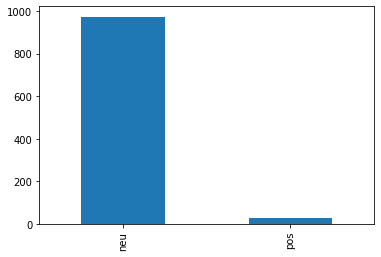

In [55]:
doge["sentiment"].value_counts().plot(kind = 'bar')

In [68]:
doge[["text", "date", "processed_text", "sentiment", "pos_score", "neg_score", "neu_score"]].head(10)

,text,date,processed_text,sentiment,pos_score,neg_score,neu_score
0,@AltcoinDailyio @maxkeiser @TheBitcoinConf Com...,2022-03-28 17:34:44,<user> come dressed up in bitcoin clothes and ...,neu,0.000,0.0,1.000
1,Must resist selling this latest pump\n#Bitcoin...,2022-03-28 17:34:42,must resist selling this latest pump bitcoin l...,neu,0.000,0.0,1.000
2,@Choi3Choice https://t.co/qIE1qJRT6A #NFTColle...,2022-03-28 17:34:41,<user> <url> nft collection btc nft commmunity...,neu,0.000,0.0,1.000
3,@EnviroSwap Nice project \n@saiful8680\n@shori...,2022-03-28 17:34:40,<user> nice project <user> airdrops donely bit...,neu,0.219,0.0,0.781
4,@SacawaginaNft https://t.co/qIE1qJRT6A #NFTCol...,2022-03-28 17:34:35,<user> <url> nft collection btc nft commmunity...,neu,0.000,0.0,1.000
5,Mirjam is teaching novices on crypto and #bitc...,2022-03-28 17:34:33,mirjam is teaching novices on crypto and bitco...,neu,0.000,0.0,1.000
6,@berliankaltim https://t.co/qIE1qJRT6A #NFTCol...,2022-03-28 17:34:31,<user> <url> nft collection btc nft commmunity...,neu,0.000,0.0,1.000
7,"@airdropinspect Strong team, in a predictable ...",2022-03-28 17:34:28,"<user> strong team , in a predictable and tran...",neu,0.272,0.0,0.728
8,History repeating once again!\n\n#Bitcoin $BTC...,2022-03-28 17:34:28,history repeating once again ! bitcoin $ btc :...,neu,0.000,0.0,1.000
9,@tiredrex_ https://t.co/qIE1qJRT6A #NFTCollect...,2022-03-28 17:34:25,<user> <url> nft collection btc nft commmunity...,neu,0.000,0.0,1.000


In [69]:
doge[["text", "date", "processed_text", "sentiment", "pos_score", "neg_score", "neu_score"]].tail(10)

,text,date,processed_text,sentiment,pos_score,neg_score,neu_score
990,@MetaNFTPunk BANXA HOLDINGS OTC: BNXAF🚨 SOON N...,2022-03-28 17:12:56,<user> banxa holdings otc : bnxaf :police_car_...,neu,0.000,0.000,1.000
991,"""The USA loves #Bitcoin because it will give A...",2022-03-28 17:12:54,""" the usa loves bitcoin because it will give a...",neu,0.467,0.000,0.533
992,#Bitcoin got me bricked up ova here!!!!!!!,2022-03-28 17:12:54,bitcoin got me bricked up ova here !,neu,0.000,0.000,1.000
993,@MirutokenIr @mirutoken 🔥Trust our performance...,2022-03-28 17:12:53,<user> :fire: trust our performance to change ...,neu,0.163,0.000,0.837
994,Don't be late buy more $pit - #ForzaPitbull Bs...,2022-03-28 17:12:53,do not be late buy more $ pit - forza pitbull ...,neu,0.094,0.000,0.906
995,YoBit Farming: Earn up to 427% APY: https://t....,2022-03-28 17:12:51,yobit farming : earn up to <percent> apy : <ur...,neu,0.000,0.000,1.000
996,"@AirdropDet Guys, don't miss this opportunity,...",2022-03-28 17:12:51,"<user> guys , do not miss this opportunity , t...",pos,0.587,0.000,0.413
997,@BitcoinFear with the correct entries no #Bitc...,2022-03-28 17:12:50,<user> with the correct entries no bitcoin bul...,neu,0.000,0.286,0.714
998,@bitcoinagile @nypost #Bitcoin has just reache...,2022-03-28 17:12:49,<user> bitcoin has just reached a resistance p...,neu,0.085,0.000,0.915
999,This week is VERY IMPORTANT week. Why? Because...,2022-03-28 17:12:49,this week is very important week . why ? becau...,neu,0.095,0.000,0.905


# Fetch price data

## Dogecoin

In [80]:
def fetch_crypto_price(coin = "dogecoin", interval = "m1"):
    """
    Fetch crypto price from coincap.io
    coin : str
        coin name : one of "dogecoin", "ethereum", "shiba-inu"
    interval : str

    """
    url = "http://api.coincap.io/v2/assets/" + coin + "/history?interval=" + interval
    payload = ""
    headers = {}
    response = requests.request("GET", url, headers=headers, data=payload)
    
    df = pd.DataFrame(json.loads(response.text)["data"])
    df = df[["priceUsd", "date"]].copy()
    df["date"] = pd.to_datetime(df["date"])
    #df.set_index("date", inplace = True)
    #df.sort_index(inplace = True)
    return df

In [81]:
coin = "dogecoin"
interval = "1m"
dogecoin_df = fetch_crypto_price(coin = "dogecoin", interval = "m1")

In [82]:
dogecoin_df

,priceUsd,date
0,0.1499714946641535,2022-03-28 17:07:00+00:00
1,0.1499177196220725,2022-03-28 17:08:00+00:00
2,0.1498913172733427,2022-03-28 17:09:00+00:00
3,0.1498349681183805,2022-03-28 17:10:00+00:00
4,0.1498733714751940,2022-03-28 17:11:00+00:00
...,...,...
1435,0.1441623792595448,2022-03-29 17:02:00+00:00
1436,0.1442646879965794,2022-03-29 17:03:00+00:00
1437,0.1443015495236030,2022-03-29 17:04:00+00:00
1438,0.1442787667862230,2022-03-29 17:05:00+00:00


# Buy indicator

# If count of pos > count of neg, then suggest to buy that coin.
# Show it as an indicator

# Show plot of sentiment for all coins
# Show plot of price for all coins

# optional : Show tweets and sentiment for all coins
